In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
mobile = pd.read_csv('Mobile.csv')


mobile.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


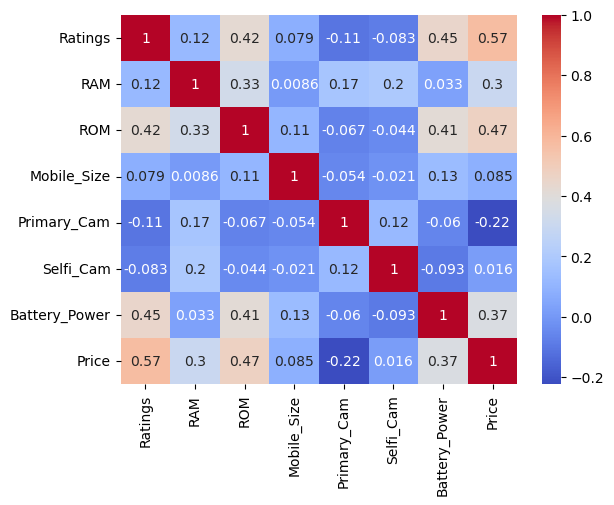

In [52]:
sns.heatmap(mobile.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [53]:
X = mobile.drop('Price',axis=1)
# Target Variable
y = mobile['Price']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [55]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred = lm.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.4222058351201412


In [58]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [59]:
y_pred = rf.predict(X_test)

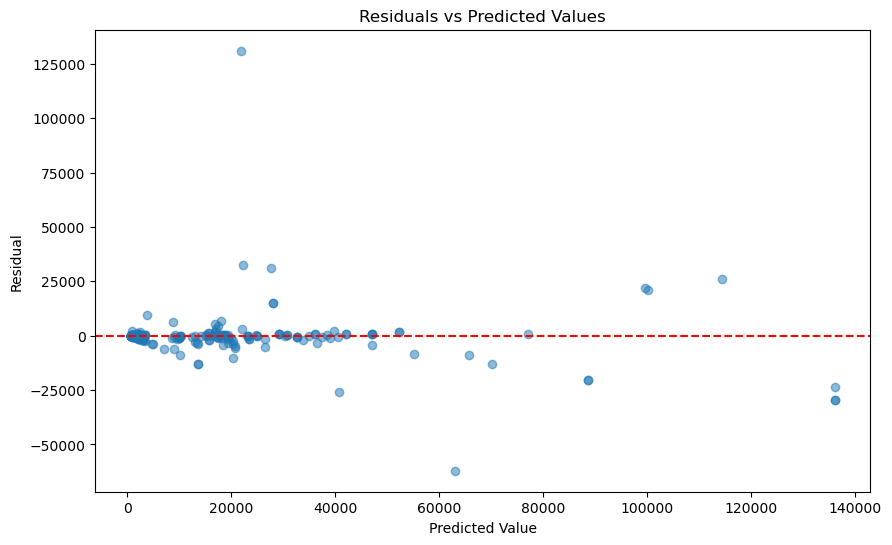

In [60]:
# Creating a DataFrame with actual and predicted values
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})

# Calculating residuals
reg_model_diff['Residual'] = reg_model_diff['Actual value'] - reg_model_diff['Predicted value']

# Creating a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(reg_model_diff['Predicted value'], reg_model_diff['Residual'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted Values')

# Show the plot
plt.show()

In [61]:
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.7911481032791631
